<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>

# MNIST mit Multi-Layer Perceptron

In dieser Lektion werden wir ein Multi Layer Perceptron Modell erstellen und versuchen damit handgeschriebenen Zahlen zu klassifizieren. Das ist ein sehr verbreitetes Einsteigerproblem für Tensorflow.

Denkt daran, dass eine einzige Lektion niemals ausreichen wird, um Deep Learning und/oder Tensorflow in seiner Komlexität abzudecken!

## Die Daten laden

Wir werden die berühmten MNIST Daten über [handgeschriebenen Zahlen](http://yann.lecun.com/exdb/mnist/) verwenden.

Die Bilder die wir verwenden werden sind schwarz-weiß Bilder der größe 28 x 28, d.h. 784 Pixel insgesamt. Unsere Features werden die Pixelwerte für jeden Pixel sein. Entweder ist der Pixel "weiß" (also eine 0 in den Daten) oder er hat einen Pixelwert.

Wir werden versuchen korrekt vorherzusagen, welche Nummer geschrieben steht. Dazu verwenden wir lediglich die Bilddaten in Form unseres Arrays. Diese Art von Problem (Image Recognition oder auf Deutsch: Bilderkennung) ist ein tolle Use Case für Deep Learning Methoden!

Die Daten sind für Deep Learning das, was der Iris Datensatz für typische Machine Learning Algorithmen ist.

# Import Bibliotheken

Dieser Code importiert mehrere Python-Bibliotheken, die für maschinelles Lernen, Datenmanipulation, Protokollierung, Zeitmessung, Datenvisualisierung, Arbeit mit binären Daten & Unit-Tests nützlich sind.

Insbesondere werden folgende Bibliotheken importiert: TensorFlow, NumPy, Logging, Time, Matplotlib und Unittest importiert.

In [ ]:
!pip install tensorflow==2.15.0 keras==2.15.0
!pip install tensorflow_dataset

ERROR: Could not find a version that satisfies the requirement tensorflow_dataset (from versions: none)
ERROR: No matching distribution found for tensorflow_dataset


In [ ]:
import tensorflow as tf
import numpy as np
import logging
import time
import matplotlib.pyplot as plt
import unittest
%matplotlib inline

# Import des MNIST Datensatzes

Wir werden die berühmten MNIST Daten über handgeschriebenen Zahlen verwenden.
Die Bilder die wir verwenden werden sind schwarz-weiß Bilder der größe 28 x 28, d.h. 784 Pixel insgesamt. Unsere Features werden die Pixelwerte für jeden Pixel sein. Entweder ist der Pixel "weiß" (also eine 0 in den Daten) oder er hat einen Pixelwert.
Wir werden versuchen korrekt vorherzusagen, welche Nummer geschrieben steht. Dazu verwenden wir lediglich die Bilddaten in Form unseres Arrays. Diese Art von Problem (Image Recognition oder auf Deutsch: Bilderkennung) ist ein tolle Use Case für Deep Learning Methoden!
Die Daten sind für Deep Learning das, was der Iris Datensatz für typische Machine Learning Algorithmen ist.
Laden wir die Daten:

In [ ]:
# Importieren der MNIST-Trainings- und Testdaten
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Daten Format

Die Daten sind im Vektor Format gespeichert, obwohl die Originaldaten eine 2-dimensionale Matrix waren, die angab, wie viele Pigmente sich an welcher Position befinden. Untersuchen wir das genauer:

In [ ]:
type(mnist)

module

In [ ]:
type(train_images)
type(test_images)

numpy.ndarray

In [ ]:
train_images[2].shape

(28, 28)

In [ ]:
sample = train_images[2].reshape(28, 28)

In [ ]:
%matplotlib inline

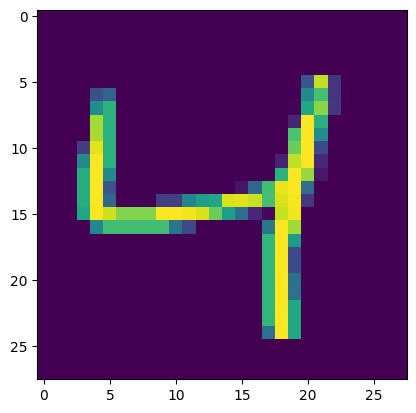

In [ ]:
plt.imshow(sample)

# Verarbeitung des MNIST Datensatzes

Dieser Code normalisiert und formt die Trainings- und Testbilder um, sodass sie als eindimensionale Arrays dargestellt werden. Anschließend teilt er die Daten in Trainings- und Testsets auf, wobei 80% der Daten für das Training und 20% für das Testen verwendet werden. Zuletzt überprüft er, ob die Form der Daten korrekt ist.

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalisierung
class Normalize(object):
    def normalize(self, X_train, X_test):
        self.scaler = MinMaxScaler()
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)
        X_train = self.scaler.fit_transform(X_train)
        X_test = self.scaler.transform(X_test)
        return (X_train, X_test)

    def inverse(self, X_train, X_test):
        X_train = self.scaler.inverse_transform(X_train)
        X_test = self.scaler.inverse_transform(X_test)
        return (X_train, X_test)

# Aufteilung der Daten
def split(X, y, splitRatio):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - splitRatio, random_state=42)
    return (X_train, y_train, X_test, y_test)

splitRatio = 0.8  # 80% Trainingsdaten, 20% Testdaten
x_train, y_train, x_test, y_test = split(train_images, train_labels, splitRatio)

# Normalisierung
normalizer = Normalize()
x_train, x_test = normalizer.normalize(x_train, x_test)

# Berechnen Sie die erwarteten Formen
expected_train_size = int(0.8 * len(train_images))
expected_test_size = int(0.2 * len(train_images))
expected_feature_size = train_images.shape[1] * train_images.shape[2]

# Überprüfen Sie die Form der Trainingsdaten
assert x_train.shape == (expected_train_size, expected_feature_size), \
    f"Erwartete Form: ({expected_train_size}, {expected_feature_size}), aber erhalten: {x_train.shape}"

# Überprüfen Sie die Form der Testdaten
assert x_test.shape == (expected_test_size, expected_feature_size), \
    f"Erwartete Form: ({expected_test_size}, {expected_feature_size}), aber erhalten: {x_test.shape}"

# Überprüfen Sie die Form der Trainingslabels
assert y_train.shape == (expected_train_size,), \
    f"Erwartete Form: ({expected_train_size},), aber erhalten: {y_train.shape}"

# Überprüfen Sie die Form der Testlabels
assert y_test.shape == (expected_test_size,), \
    f"Erwartete Form: ({expected_test_size},), aber erhalten: {y_test.shape}"


## Einbindung der my_logger Funktion

Auf Basis des Code-Snippet der [Website]( https://towardsdatascience.com/unit-testing-and-logging-for-data-science-d7fb8fd5d217) aus der Aufgabenstellung.

In [ ]:
def my_logger(orig_func):
    logging.basicConfig(filename='{}.log'.format(orig_func.__name__), level=logging.INFO)

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        logging.info(
            'Ran with args: {}, and kwargs: {}'.format(args, kwargs))
        return orig_func(*args, **kwargs)

    return wrapper

# Einbindung der my_timer Funktion

Auf Basis des Code-Snippet der [Website]( https://towardsdatascience.com/unit-testing-and-logging-for-data-science-d7fb8fd5d217) aus der Aufgabenstellung.

In [ ]:
def my_timer(orig_func):
    import time

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = orig_func(*args, **kwargs)
        t2 = time.time() - t1
        print('{} ran in: {} sec'.format(orig_func.__name__, t2))
        return result

    return wrapper

# Eimbindung der Klasse "TheAlgorithm"

Auf Basis des Code-Snippet der [Website]( https://towardsdatascience.com/unit-testing-and-logging-for-data-science-d7fb8fd5d217) aus der Aufgabenstellung.

In [ ]:
from functools import wraps
from sklearn.preprocessing import Normalizer


class TheAlgorithm(object):
    @my_logger
    @my_timer
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train, self.y_train, self.X_test, self.y_test = X_train, y_train, X_test, y_test

    @my_logger
    @my_timer
    def fit(self):
        x_train, y_train, x_test, y_test = self.X_train, self.y_train, self.X_test, self.y_test

        normalizer = Normalize()  # Use the correct class name here
        x_train, x_test = normalizer.normalize(x_train, x_test)

        train_samples = x_train.shape[0]

        self.classifier = LogisticRegression(
            C=50. / train_samples,
            multi_class='multinomial',
            penalty='l1',
            solver='saga',
            tol=0.1,
            class_weight='balanced',
        )

        self.classifier.fit(x_train, y_train)
        self.train_predictions = self.classifier.predict(x_train)
        self.train_accuracy = np.mean(self.train_predictions.ravel() == y_train.ravel()) * 100
        self.train_confusion_matrix = confusion_matrix(y_train, self.train_predictions)
        return self.train_accuracy

    @my_logger
    @my_timer
    def predict(self):
        x_test = self.X_test  # Test data doesn't need to be normalized again

        self.test_predictions = self.classifier.predict(x_test)
        self.test_accuracy = np.mean(self.test_predictions.ravel() == self.y_test.ravel()) * 100
        self.test_confusion_matrix = confusion_matrix(self.y_test, self.test_predictions)
        self.report = classification_report(self.y_test, self.test_predictions)
        print("Classification Report for the classifier:\n%s\n" % (self.report))

        return self.test_accuracy


## Parameter & Netzwerk Parameter

 - **Lernrate** - Sie bestimmt die Geschwindigkeit, mit der die Kostenfunktion optimiert wird.
 - **Trainingsepochen** - Sie legt die Anzahl der Durchläufe fest, die das
 Modell durch die Trainingsdaten machen soll.
 - **Batch-Größe** - Sie definiert die Menge an Trainingsdaten, die in einem Durchlauf verarbeitet werden.

In [ ]:
# Parameter
learning_rate = 0.001     # Lernrate - Geschwindigkeit
training_epochs = 15      # Anzahl der Durchläufe
batch_size = 100          # Menge der Trainingsdaten

# Netzwerk Parameter
n_hidden_1 = 256          # Anzahl an Features
n_hidden_2 = 256          # Anzahl an Features
n_input = 784             # MNIST Daten Input
n_classes = 10            # MNIST Klassen
n_samples = len(x_train)  # Anzahl der Trainingsbeispiele

### Tensorflow Graph Input

In [ ]:
x = tf.keras.Input(shape=(n_input,), dtype=tf.float32)
y = tf.keras.Input(shape=(n_classes,), dtype=tf.float32)

## MultiLayer Modell

Es ist Zeit unser Modell zu erstellen. Wiederholen wir deshalb kurz, was wir erstellen wollen:

Zuerst erhalten wir einen *Input* in Form eines Datenarrays und schicken diesen an die erste *Hidden Layer*. Dann wird den Daten ein  *Weight* zwischen den Schichten zugewiesen (welches zuerst ein zufälliger Wert ist). Anschließend wird es an einen *Node* geschicht und unterläuft eine *Activation Function* (zusammen mit einem Bias, wie in der Neural Network Lektion erwähnt). Dann geht es weiter zur nächsten *Layer* und immer so weiter, bis zur finalen *Output Layer*. In unserem Fall werden wir nur 2 *Hidden Layers* verwenden. Je mehr wir davon verwenden, desto länger braucht das Modell (aber er hat mehr Möglichkeiten um die Genauigkeit zu erhöhen).

Sobald die transformierte Daten die *Output Layer* erreicht haben müssen wir sie auswerten. Hier verwenden wir eine *Loss Function* (auch Cost Function genannt). Diese berechnet, wie sehr wir vom gewünschten Ergebnis entfernt sind. In diesem Fall: Wie viele der Klassen wir richtig zugeteilt haben.

Dann wenden wir eine Optimierungsfunktion an, um die *Costs* (bzw. den Error) zu minimieren. Dies geschiet durch die Anpassung der *Weights* entlang des Netzes. Wir verwenden in unserem Beispiel den [Adam Optimizer](https://arxiv.org/pdf/1412.6980v8.pdf), welcher eine (im Vergleich zu anderen) sehr neue Entwicklung ist.

Wir können anpassen, wie schnell diese Optimierung angewendet wird, indem wir unseren *Learning Rate* Parameter anpassen. Je geringer die Rate, desto höher die Möglichkeiten für Anpassungen. Dies erzeugt allerdings die Kosten einer erhöhten Wartezeit. Ab einem bestimmten Punkt lohnt es sich nicht mehr, die Learning Rate weiter zu senken.

Jetzt können wir unser Modell erstellen. Wir beginnen mit 2 Hidden Layers, welche die []() Activation Function verwenden. Dies ist eine einfache Umformungsfunktion, die entweder x oder 0 zurückgibt. Für unsere finale Output Layer verwenden wir eine lineare Activation mit Matrixmultiplikation:

In [ ]:
@my_logger  # Protokolieren der Funktion
@my_timer   # Zeitmessung der Funktion
def multilayer_perceptron(x, weights, biases):

    # Erste Hidden layer mit RELU Activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    # Zweite Hidden layer mit RELU Activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Letzte Output layer mit linearer Activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

## Weights und Bias

Damit unser Tensorflow Modell funktioniert müssen wir zwei Dictionaries anlegen, die unsere Weights und Biases enthalten. Wir können das `tf.variable` Objekt verwenden. Dies ist anders als eine Konstante, da Tensorflow's Graph Objekt alle Zustände der Variablen wahrnimmt. Eine Variable ist ein anpassbares Tensor, der zwischen Tensorflow's Graph von interagierenden Operationen lebt. Er kann durch die Berechnung verwendet und verändert werden. Wir werden die Modell Parameter generell als Variablen verwenden. Aus der Dokumentation können wir entnehmen:

    A variable maintains state in the graph across calls to `run()`. You add a variable to the graph by constructing an instance of the class `Variable`.

    The `Variable()` constructor requires an initial value for the variable, which can be a `Tensor` of any type and shape. The initial value defines the type and shape of the variable. After construction, the type and shape of the variable are fixed. The value can be changed using one of the assign methods.
    
Wir werden Tensorflow's eingebaute `random_normal` Methode verwenden, um zufällige Werte für unsere Weights und Biases zu erstellen.

In [ ]:
# Gewichtsinitialisierung
weights = {
    'h1': tf.Variable(tf.initializers.RandomNormal()(shape=[n_input, n_hidden_1])),
    'h2': tf.Variable(tf.initializers.RandomNormal()(shape=[n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.initializers.RandomNormal()(shape=[n_hidden_2, n_classes]))
}

In [ ]:
# Bias-Initialisierung
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_classes]))
}

In [ ]:
# Model erstellen
pred = multilayer_perceptron(x, weights, biases)

multilayer_perceptron ran in: 0.09383225440979004 sec


## Cost und Optimierungs-Funktion

Wir verwenden Tensorflow's eingebaute Funktionen für diesesn Teil. Weitere Details bietet die Dokumentation:

In [ ]:
# Cost und Optimierungsfunktion definieren
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits=pred))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

## Das Modell trainieren

### next_batch()

Bevor wir beginnen möchte ich eine weitere nützliche Funktion in unserem MNIST Datenobjekt abdecken, die `next_batch` heißt. Diese gibt ein Tupel in der Form (X,y) mit einem X Array der Daten und einem y Array der Klasse. Zum Beispiel:

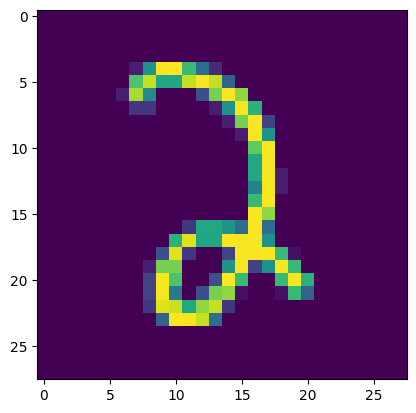

In [ ]:
# Erstellen des Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Erhöhen der Batch-Größe für effizienteres Training
batch_size = 1
train_dataset = train_dataset.shuffle(buffer_size=len(x_train)).batch(batch_size)

# Funktion zur Visualisierung eines Beispieldatensatzes
def visualize_sample(Xsamp):
    Xsamp_numpy = Xsamp.numpy()
    plt.imshow(Xsamp_numpy.reshape(28, 28))

# Anwenden der Visualisierungsfunktion auf ein Beispieldatensatz
Xsamp, ysamp = next(iter(train_dataset))
visualize_sample(Xsamp[0])


In [ ]:
print(ysamp)

tf.Tensor([2], shape=(1,), dtype=uint8)


In [ ]:
def my_logger(orig_func):
    # Ein Dekorierer, der die Argumente einer Funktion protokolliert.
    logging.basicConfig(filename=f'{orig_func.__name__}.log', level=logging.INFO)

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        logging.info(f'Ran with args: {args}, and kwargs: {kwargs}')
        return orig_func(*args, **kwargs)

    return wrapper

def my_timer(orig_func):
    # Ein Dekorierer, der die Ausführungszeit einer Funktion misst.
    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = orig_func(*args, **kwargs)
        elapsed_time = time.time() - start_time
        print(f'{orig_func.__name__} ran in: {elapsed_time} sec')
        return result

    return wrapper


## Die Session ausführen

In diesm Abschnitt wird ein neuronales Netzwerk trainiert. Es werden nur **0,5%** der gesamten Daten für das Training verwendet. Während des Trainings werden die Gewichte und Bias des Netzwerks aktualisiert, um den durchschnittlichen Verlust (Kosten) über alle Batches in jeder Epoche zu minimieren. Nach Abschluss des Trainings werden die Kosten für jede Epoche und eine abschließende Nachricht ausgegeben.

In [ ]:
from tensorflow import keras

n_samples_to_process = int(n_samples * (0.5 / 100)) # Nur 0.5% der Daten werden herangezogen

# Training Epochs
for epoch in range(training_epochs):

    # Start mit cost = 0.0
    avg_cost = 0.0

    # Konvertiere die Anzahl an Batches in eine Integer
    total_batch = int(n_samples_to_process / batch_size)

    # Schleife für alle Batches
    for i in range(total_batch):

        # Den nächsten Batch an Trainingsdaten und -labels nehmen
        batch_x = tf.cast(x_train[i * batch_size: (i + 1) * batch_size], tf.float32)
        batch_y = tf.cast(y_train[i * batch_size: (i + 1) * batch_size], tf.float32)

        # Gradienten berechnen
        with tf.GradientTape() as tape:

            pred = multilayer_perceptron(batch_x, weights, biases)
            loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=batch_y, logits=pred))

        gradients = tape.gradient(loss, list(weights.values()) + list(biases.values()))
        optimizer.apply_gradients(zip(gradients, list(weights.values()) + list(biases.values())))

        # Durchschnittliche Kosten berechnen
        avg_cost += loss / total_batch

    print("Epoch: {} Cost={:.4f}".format(epoch + 1, avg_cost))

print("Modellierung ist beendet: {} Epochs of Training".format(training_epochs))

multilayer_perceptron ran in: 0.003935337066650391 sec
multilayer_perceptron ran in: 0.0027883052825927734 sec
multilayer_perceptron ran in: 0.0017819404602050781 sec
multilayer_perceptron ran in: 0.002532958984375 sec
multilayer_perceptron ran in: 0.0027017593383789062 sec
multilayer_perceptron ran in: 0.0022029876708984375 sec
multilayer_perceptron ran in: 0.0021719932556152344 sec
multilayer_perceptron ran in: 0.002153158187866211 sec
multilayer_perceptron ran in: 0.002050161361694336 sec
multilayer_perceptron ran in: 0.0025458335876464844 sec
multilayer_perceptron ran in: 0.002514362335205078 sec
multilayer_perceptron ran in: 0.002680540084838867 sec
multilayer_perceptron ran in: 0.0023660659790039062 sec
multilayer_perceptron ran in: 0.0031824111938476562 sec
multilayer_perceptron ran in: 0.002172708511352539 sec
multilayer_perceptron ran in: 0.0022084712982177734 sec
multilayer_perceptron ran in: 0.002229928970336914 sec
multilayer_perceptron ran in: 0.0022177696228027344 sec
mul

## Modell Auswertung

Tensorflow bietet einige eingebaute Funktionen, die uns bei der Auswertung helfen. Dazu gehören `tf.equal` und `tf.reduce_mean`.


### tf.equal

Dies ist im Grunde genommen nur eine Kontrolle, ob die Vorhersagen mit den Labels übereinstimmen. Da wir in unserem Fall wissen, dass die Labels eine 1 in einem Array von Nullen sind, können wir `argmax()` verwenden, um die Position zu vergleichen. Denke daran, dass y immer noch der Platzhalter ist, den wir anfangs erstellt haben. Wir werden eine Reihe an Operationen durchführen, um einen Tensor zu erhalten, in den wir die Testdaten einlesen können, um es auszuwerten.

In [ ]:
# Teste das Modell
correct_predictions = tf.math.reduce_all(tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1)))

In [ ]:
print(correct_predictions)

KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.bool, name=None), name='tf.math.reduce_all_1/All:0', description="created by layer 'tf.math.reduce_all_1'")


Um numerische Werte für unsere Vorhersagen zu erhalten müssen wir `tf.cast` verwenden, um den Tensor mit Booleans zurückzuführen in einen Tensor mit Floats. Dann können wir den Durchschnitt nehmen.

In [ ]:
correct_predictions = tf.cast(correct_predictions, "float")

In [ ]:
print(correct_predictions)

KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.cast_1/Cast:0', description="created by layer 'tf.cast_1'")


Jetzt können wir `tf.reduce_mean` verwenden, um den Durchschnitt der Elemente im Tensor zu erhalten:

In [ ]:
accuracy = tf.reduce_mean(correct_predictions)

In [ ]:
type(accuracy)

keras.src.engine.keras_tensor.KerasTensor

# Neuronales Netzwerk-Modell

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Erstellung
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(n_input,)),
    tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(n_classes, activation=None)])

# Kompilieren
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Trainieren des Modells
x_train_flattened = x_train.reshape(-1, n_input)
batch_size = 128
model.fit(x_train_flattened, y_train, batch_size=batch_size, epochs=training_epochs,
          validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Evaluierung
x_test_flattened = x_test.reshape(-1, n_input)
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/15
300/300 [==============================] - 5s 12ms/step - loss: 0.2381 - sparse_categorical_accuracy: 0.9273 - val_loss: 0.1474 - val_sparse_categorical_accuracy: 0.9621
Epoch 2/15
 13/300 [>.............................] - ETA: 2s - loss: 0.0906 - sparse_categorical_accuracy: 0.9712

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 3s 11ms/step - loss: 0.0853 - sparse_categorical_accuracy: 0.9733 - val_loss: 0.1068 - val_sparse_categorical_accuracy: 0.9658
Epoch 3/15
300/300 [==============================] - 5s 16ms/step - loss: 0.0530 - sparse_categorical_accuracy: 0.9831 - val_loss: 0.0984 - val_sparse_categorical_accuracy: 0.9693
Epoch 4/15
300/300 [==============================] - 3s 11ms/step - loss: 0.0374 - sparse_categorical_accuracy: 0.9882 - val_loss: 0.1066 - val_sparse_categorical_accuracy: 0.9688
Epoch 5/15
300/300 [==============================] - 3s 11ms/step - loss: 0.0308 - sparse_categorical_accuracy: 0.9903 - val_loss: 0.1268 - val_sparse_categorical_accuracy: 0.9640
Epoch 6/15
300/300 [==============================] - 4s 12ms/step - loss: 0.0241 - sparse_categorical_accuracy: 0.9922 - val_loss: 0.0966 - val_sparse_categorical_accuracy: 0.9746
Epoch 7/15
300/300 [==============================] - 4s 14ms/step - loss: 0.0174 - sparse_categorical_acc

# Prüfungsaufgeben 1 & 2

## Initialisierung Unittest

Auf Basis des Code-Snippet der [Website]( https://towardsdatascience.com/unit-testing-and-logging-for-data-science-d7fb8fd5d217) aus der Aufgabenstellung.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


if __name__ == '__main__':
    X = x_train
    y = y_train
    print('MNIST:', X.shape, y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - splitRatio, random_state=42)
    np.random.seed(31337)
    ta = TheAlgorithm(X_train, y_train, X_test, y_test)

    train_accuracy = ta.fit()
    print('Train Accuracy:', train_accuracy)

    test_accuracy = ta.predict()
    print('Test Accuracy:', test_accuracy)

MNIST: (48000, 784) (48000,)
__init__ ran in: 1.52587890625e-05 sec
fit ran in: 16.252377033233643 sec
Train Accuracy: 72.53645833333333
Classification Report for the classifier:
              precision    recall  f1-score   support

           0       0.73      0.93      0.81       963
           1       0.75      0.95      0.84      1099
           2       0.77      0.61      0.68       923
           3       0.67      0.76      0.71      1022
           4       0.72      0.78      0.75       961
           5       0.62      0.44      0.51       844
           6       0.73      0.85      0.79       948
           7       0.75      0.79      0.77       978
           8       0.80      0.54      0.65       922
           9       0.77      0.59      0.67       940

    accuracy                           0.73      9600
   macro avg       0.73      0.72      0.72      9600
weighted avg       0.73      0.73      0.72      9600


predict ran in: 0.2470109462738037 sec
Test Accuracy: 73.1979

# Durchführung der Unittests ausgeführt


Auf Basis des Code-Snippet der [Website]( https://towardsdatascience.com/unit-testing-and-logging-for-data-science-d7fb8fd5d217) aus der Aufgabenstellung.

In [ ]:
class TestInput(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        pass

    @classmethod
    def tearDownClass(cls):
        pass

    def setUp(self):
        print('setUp')
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - splitRatio, random_state=42)
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.train_accuracy = train_accuracy
        self.test_accuracy = test_accuracy
        self.train_confusion_matrix = ta.train_confusion_matrix
        self.test_confusion_matrix = ta.test_confusion_matrix

    def tearDown(self):
        pass

    def test_fit(self):
        np.random.seed(31337)
        self.ta = TheAlgorithm(self.X_train, self.y_train, self.X_test, self.y_test)
        self.assertEqual(self.ta.fit(), self.train_accuracy)
        self.assertTrue(np.array_equal(self.ta.train_confusion_matrix, self.train_confusion_matrix))

    def test_predict(self):
        np.random.seed(31337)
        self.ta = TheAlgorithm(self.X_train, self.y_train, self.X_test, self.y_test)
        self.ta.fit()
        self.assertEqual(self.ta.predict(), self.test_accuracy)
        self.assertTrue(np.array_equal(self.ta.test_confusion_matrix, self.test_confusion_matrix))

    def test_duration(self):
        np.random.seed(31337)
        self.ta = TheAlgorithm(self.X_train, self.y_train, self.X_test, self.y_test)
        start_time = time.time()
        self.ta.fit()
        end_time = time.time()
        elapsed_time = end_time - start_time
        representative_runtime = 14 #Repräsentativer Durchschnittswert basierend auf früheren Läufen --> definiert auf 14 Sekunden
        max_allowed_runtime = 1.2 * representative_runtime #Grenzwert 120%
        self.assertLessEqual(elapsed_time, max_allowed_runtime)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


setUp
__init__ ran in: 5.245208740234375e-06 sec


.

fit ran in: 14.972764015197754 sec
setUp
__init__ ran in: 3.814697265625e-06 sec


.

fit ran in: 13.540144205093384 sec
setUp
__init__ ran in: 1.33514404296875e-05 sec


.
----------------------------------------------------------------------
Ran 3 tests in 42.762s

OK


fit ran in: 13.498198986053467 sec
Classification Report for the classifier:
              precision    recall  f1-score   support

           0       0.73      0.93      0.81       963
           1       0.75      0.95      0.84      1099
           2       0.77      0.61      0.68       923
           3       0.67      0.76      0.71      1022
           4       0.72      0.78      0.75       961
           5       0.62      0.44      0.51       844
           6       0.73      0.85      0.79       948
           7       0.75      0.79      0.77       978
           8       0.80      0.54      0.65       922
           9       0.77      0.59      0.67       940

    accuracy                           0.73      9600
   macro avg       0.73      0.72      0.72      9600
weighted avg       0.73      0.73      0.72      9600


predict ran in: 0.06834959983825684 sec



# Gut gemacht!